# Making imports


In [59]:
import math
import numpy as np
from matplotlib import pyplot as plt
import sys
import random
import scipy.optimize as opt
from scipy import stats

random.seed(19680801)
np.random.seed(19680801)

# Task 2

# Part 1

# Class for storing coords

In [5]:
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y

# Defining function for searching min values

In [6]:
f_1 = lambda x: x**3
a_1 = 0
b_1 = 1

f_2 = lambda x: abs(x - 0.2)
a_2 = 0
b_2 = 1

f_3 = lambda x: x * np.sin(1 / x)
a_3 = 0.01
b_3 = 1

f_list = [f_1, f_2, f_3]

# Defining optimization methods

In [7]:
def exhaustive_search(func, a, b, e = 0.001):
    optim_point = Point(math.inf, math.inf)
    
    n = int((b - a) / e)
    step = (b - a) / n
    
    for k in range(0, n):
        x_k = a + k * step
        y_k = func(x_k)
        
        if optim_point.y > y_k:
            optim_point = Point(x_k, y_k)
    
    iter_count = n
    f_calc_count = n

    return optim_point, iter_count, f_calc_count

In [8]:
def dichotomy(func, a, b, e = 0.001):
    sigma = random.uniform(0, e)
    
    iter_count = 0
    f_calc_count = 0
    
    while abs(a - b) > e:
        iter_count += 1
        f_calc_count += 2
        
        x1 = (a + b - sigma) / 2
        x2 = (a + b + sigma) / 2
        
        f_x1 = func(x1)
        f_x2 = func(x2)
        
        if(f_x1 <= f_x2):
            b = x2
        else:
            a = x1
            
    min_x = (a + b) / 2
    min_y = (f_x1 + f_x2)  / 2
    optim_point = Point(min_x, min_y)
    
    return optim_point, iter_count, f_calc_count

In [9]:
def golden_section(func, a, b, e = 0.001):
    iter_count = 0
    f_calc_count = 2
    
    delta = (3 - math.sqrt(5))  * (b - a) / 2
            
    x1 = a + delta
    x2 = b - delta
    
    f_x1 = func(x1)
    f_x2 = func(x2)
    
    while abs(a - b) >= e:
        iter_count += 1
        f_calc_count += 1
        
        if(f_x1 <= f_x2):
            b = x2
            x2 = x1
            
            delta = ((3 - math.sqrt(5)) / 2) * (b - a)
            x1 = a + delta   
            
            f_x2 = f_x1
            f_x1 = func(x1)
        else:
            a = x1
            x1 = x2
            
            delta = ((3 - math.sqrt(5)) / 2) * (b - a)
            x2 = b - delta
            
            f_x1 = f_x2
            f_x2 = func(x2)
            
    min_x = (a + b) / 2
    min_y = (f_x1 + f_x2)  / 2
    optim_point = Point(min_x, min_y)
    
    return optim_point, iter_count, f_calc_count

methods_list = [exhaustive_search, dichotomy, golden_section]

# Some functions for graphs

In [10]:
marks = ['s', '^', 'o']
def plot_func_and_optimal_point(func, methods_and_points, a, b, func_name):
    fig, ax = plt.subplots(len(methods_and_points), figsize=(6, 10))
    
    fig.suptitle(func_name)
    
    x = np.linspace(a, b, num=100)

    for idx, (method, marker) in enumerate(zip(methods_and_points,marks)):
        ax[idx].plot(x, func(x))
        optim_point = methods_and_points[method]
        
        ax[idx].plot(optim_point.x, optim_point.y,
            marker=marker, label=method)
        
        ax[idx].text(optim_point.x, optim_point.y + 0.05,
             '({0:0.2f}, {1:0.2f})'.format(optim_point.x, optim_point.y,))
    
        ax[idx].set(xlabel='x', ylabel='y')
    
        ax[idx].legend()
        ax[idx].grid()

    plt.show()

In [11]:
def make_table(table_data,
               row_headers = ['exhaustive_search','dichotomy','golden_sections'],
               column_headers = ['iter_count','f_calc_count']):
    
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=table_data,
          rowLabels=row_headers,
          colLabels=column_headers,
             loc='center',
            cellLoc='center')

    plt.show()

# Calculating min value of functions by different methods

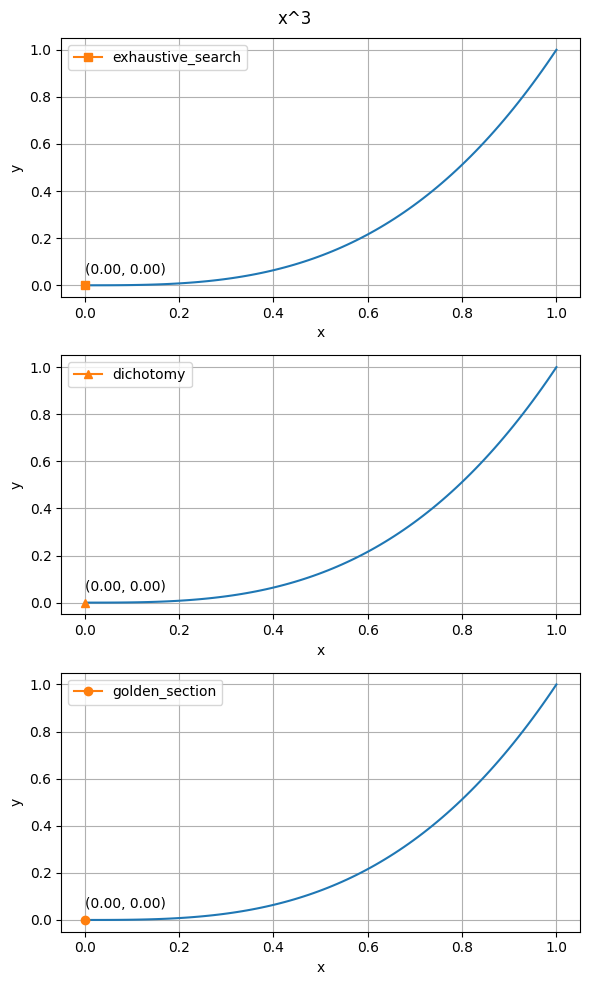

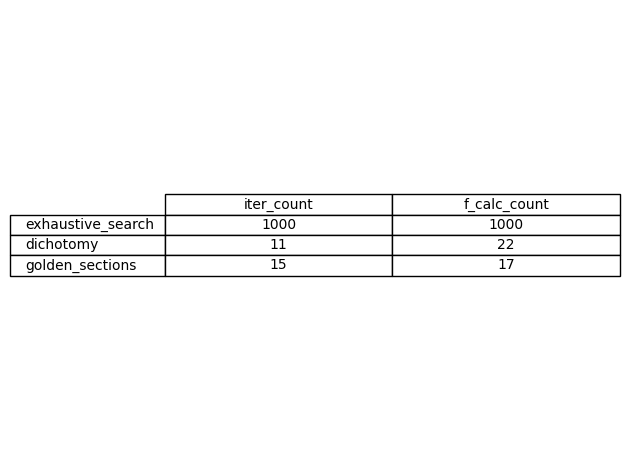

In [12]:
methods_and_points = {}
table_data = []

for m in methods_list:
    optim, iter_count, f_calc_count = m(f_1, a = a_1, b = b_1)
    methods_and_points[m.__name__] = optim
    table_data.append([iter_count, f_calc_count])

plot_func_and_optimal_point(f_1, methods_and_points, a = a_1, b = b_1, func_name = 'x^3')
make_table(table_data)

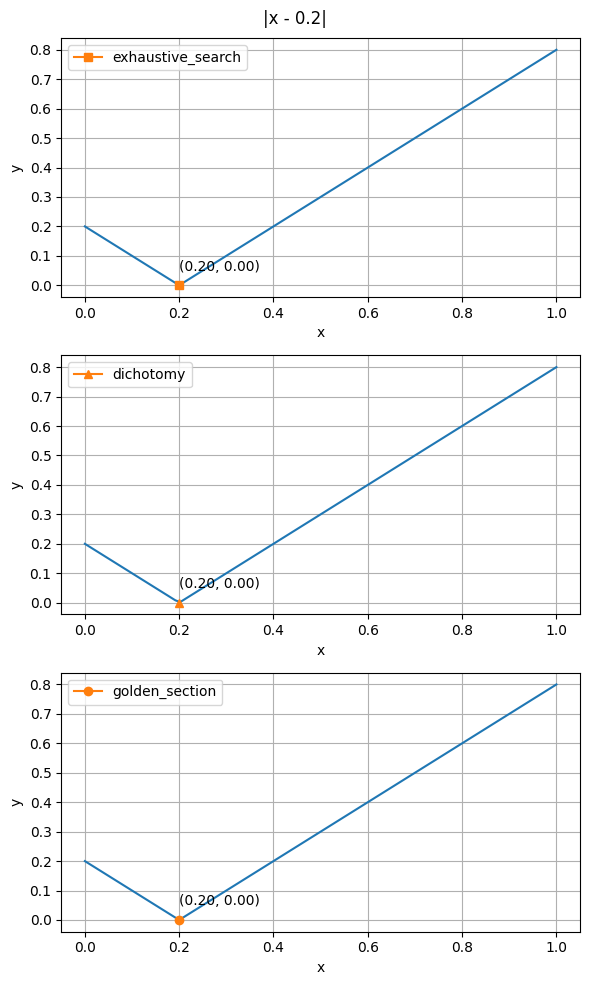

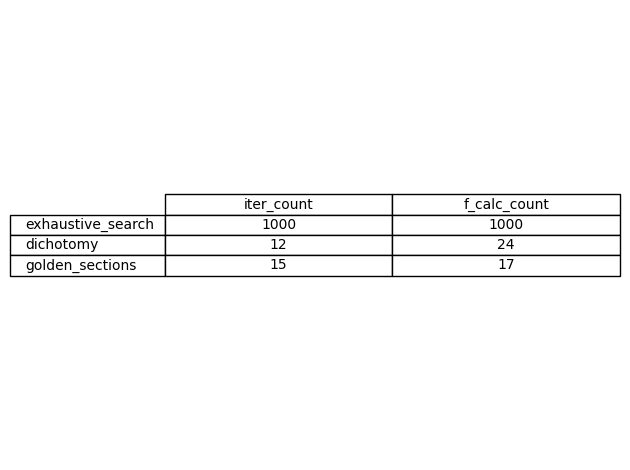

In [13]:
methods_and_points = {}
table_data = []

for m in methods_list:
    optim, iter_count, f_calc_count = m(f_2, a = a_2, b = b_2)
    methods_and_points[m.__name__] = optim
    table_data.append([iter_count, f_calc_count])

plot_func_and_optimal_point(f_2, methods_and_points, a = a_2, b = b_2, func_name = '|x - 0.2|')
make_table(table_data)

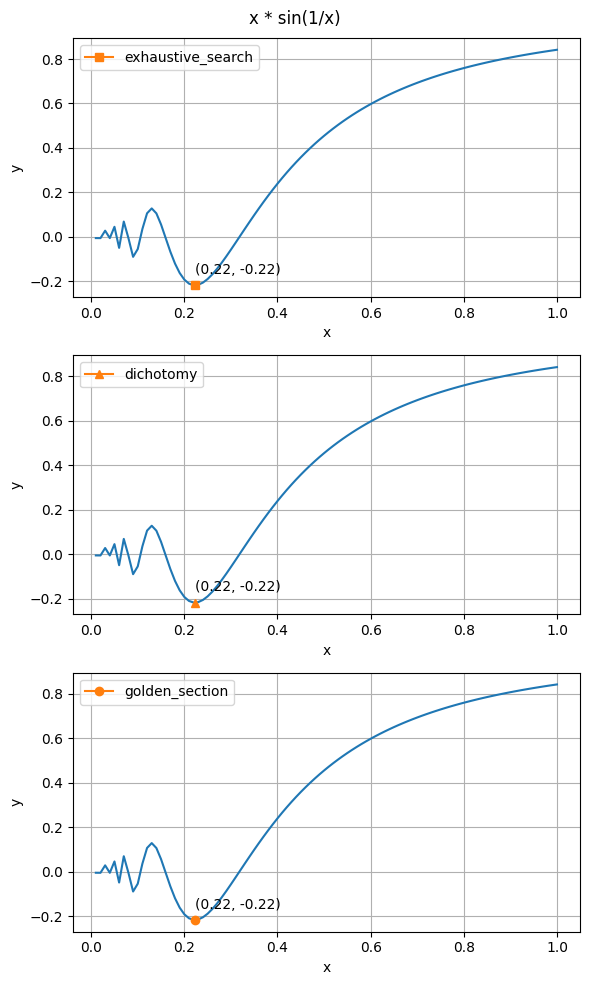

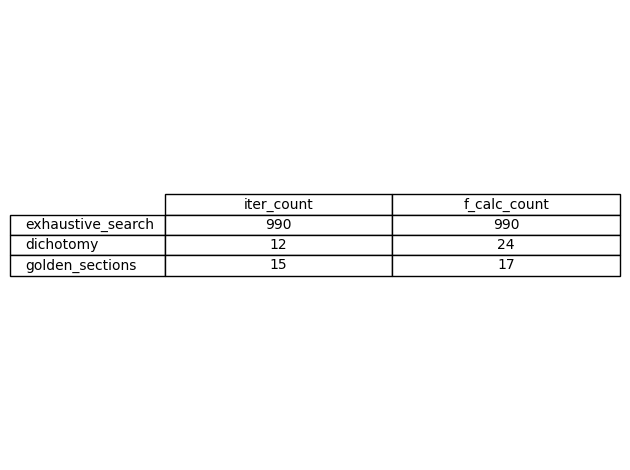

In [14]:
methods_and_points = {}
table_data = []

for m in methods_list:
    optim, iter_count, f_calc_count = m(f_3, a = a_3, b = b_3,)
    methods_and_points[m.__name__] = optim
    table_data.append([iter_count, f_calc_count])

plot_func_and_optimal_point(f_3, methods_and_points, a = a_3, b = b_3, func_name = 'x * sin(1/x)')
make_table(table_data)

# PART ||

## Generate random array

In [63]:
a = random.random()
b = random.random()

print(a, b)

0.5894752193013157 0.2771740152291189


In [64]:
x = np.linspace(0, 101, 101) / 100
sigma = np.random.normal(0, 0.1, 101)

y = a * x + b + sigma

# Deviation is too large

### The data is almost random and the correlation is close to 0 with variance = 1, so it was decided to reduce the variance to 0.1

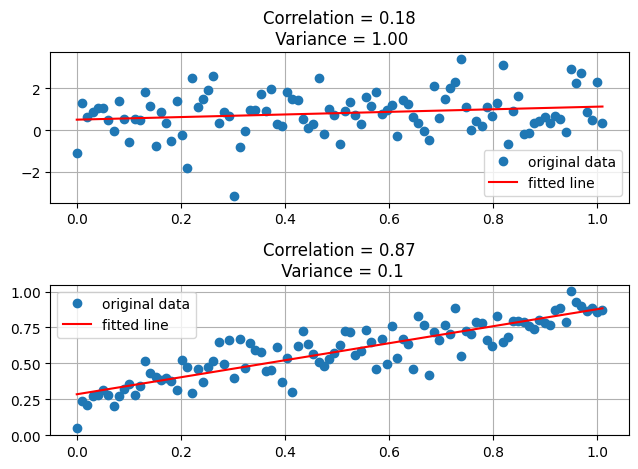

In [67]:
x_normal = np.linspace(0, 101, 101) / 100
sigma_normal = np.random.normal(0, 1, 101)

y_normal = a * x_normal + b + sigma_normal


fig, ax = plt.subplots(2)

res = stats.linregress(x_normal, y_normal)
r, p = stats.pearsonr(x_normal, y_normal)

ax[0].plot(x_normal, y_normal, 'o', label='original data')
ax[0].plot(x_normal, res.intercept + res.slope*x_normal, 'r', label='fitted line')
ax[0].title.set_text('Correlation = ' + "{:.2f}".format(r)
                        + '\n Variance = ' + "{:.2f}".format(1) )
ax[0].grid(True)
ax[0].legend()

res = stats.linregress(x, y)
r, p = stats.pearsonr(x, y)

ax[1].plot(x, y, 'o', label='original data')
ax[1].plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
ax[1].title.set_text('Correlation = ' + "{:.2f}".format(r)
                        + '\n Variance = ' + "{:.1f}".format(0.1) )

ax[1].grid(True)
ax[1].legend()

plt.show()

Text(0.5, 0.5, 'Bias')

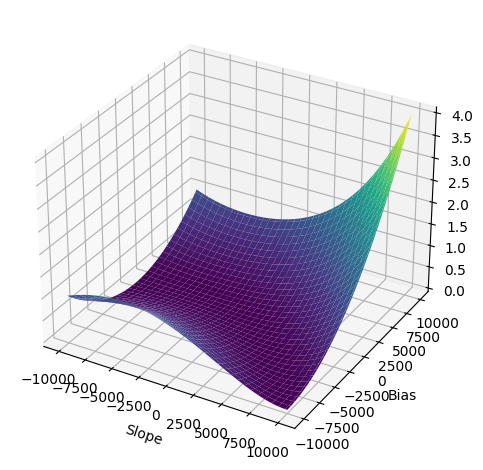

In [68]:
slope = np.linspace(-10000,10000,num=101)  
bias = np.linspace(-10000, 10000,num=101)  
w0, w1 = np.meshgrid(slope, bias)
ypred = w0*x + w1  
loss = np.power((y-ypred),2)  
fig = plt.figure()  
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(w0,  
                    w1,  
                    loss,  
                    label="Loss surface",  
                    cmap='viridis', edgecolor='none')  

ax.set_xlabel('Slope')  
ax.set_ylabel('Bias')  


# Some more functions for graphs

In [49]:
colors = ['b','g','r','c','m','y','k']

def plot_aprox_result(x, y, methods_and_coafs, aprox_func, aprox_method_name):
    num_of_plots = len(methods_and_coafs) + 1
    fig, ax = plt.subplots(num_of_plots, figsize=(6, 10))
    
    fig.suptitle(aprox_method_name)
    
    for idx, (method) in enumerate(methods_and_coafs) :
        ax[idx].scatter(x, y)
        coef = methods_and_coafs[method]
        
        color = colors[idx]
        ax[idx].plot(x, aprox_func(x, coef[0], coef[1] ), label=method, color=color)
        ax[idx].set(xlabel='x', ylabel='y')
    
        ax[idx].legend()
        ax[idx].grid()
    
    num_of_plots -= 1
    ax[num_of_plots].scatter(x, y)
    ax[num_of_plots].set(xlabel='x', ylabel='y')
    
    for idx, (method) in enumerate(methods_and_coafs):
       
        coef = methods_and_coafs[method]
        print(coef)
        
        color = colors[idx]
        ax[num_of_plots].plot(x, aprox_func(x, coef[0], coef[1] ), label=method, color=color)
    
        ax[num_of_plots].legend()
        ax[num_of_plots].grid()
        
    plt.show()

In [50]:
def make_table_2d(table_data,
               row_headers = ['exhaustive_search_2d','Gauss','Nelder-Mead'],
               column_headers = ['iter_count','f_calc_count', 'precision']):
    
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=table_data,
        rowLabels=row_headers,
        colLabels=column_headers,
        loc='center',
        cellLoc='center')

    plt.show()

# Defining loss functions for regression

In [51]:
def linear(x, a, b): 
    return a * x + b

def rational(x, a, b):
    return a / (1 + b * x)

#Spesial version for loss to use in scipy optimisation
def loss_linear(z, *params): 
    x, y = params
    a, b = z
    return np.sum((linear(x, a, b) - y)**2)

#Functional version for loss to calc precision
def f_loss_linear(x, y, a, b): 
    return np.sum((linear(x, a, b) - y)**2)

#Spesial version for loss to use in scipy optimisation
def loss_rational(z, *params): 
    x, y = params
    a, b = z
    return np.sum((rational(x, a, b) - y)**2)

#Functional version for loss to calc precision
def f_loss_rational(x, y, a, b): 
    return np.sum((rational(x, a, b) - y)**2)

# Calculating regression coefs by different methods

# Brute force method linear

In [37]:
brute_force = opt.brute(loss_linear, ([0,1],[0,1]), args=(x,y),  Ns = 1000, full_output=True)

In [38]:
brute_force_coafs = brute_force[0]
grid_size_x, grid_size_y = len(brute_force[2][0]), len(brute_force[2][0])
brute_froce_iter_count =  grid_size_x * grid_size_y
brute_force_f_calc_count = brute_froce_iter_count
brute_force_precision = f_loss_linear(x, y, brute_force_coafs[0], brute_force_coafs[1])

In [39]:
brute_force_result = [brute_froce_iter_count, brute_force_f_calc_count, brute_force_precision]

In [40]:
brute_force_result

[1000000, 1000000, 0.9756353533412527]

# Brute force method rational

In [41]:
brute_force_rational = opt.brute(loss_rational, ([0,1],[0,1]), args=(x,y),  Ns = 1000, full_output=True)

In [42]:
brute_force_coafs_rational = brute_force_rational[0]
grid_size_x, grid_size_y = len(brute_force_rational[2][0]), len(brute_force_rational[2][0])
brute_froce_iter_count_rational =  grid_size_x * grid_size_y
brute_force_f_calc_count_rational = brute_froce_iter_count_rational
brute_force_precision_rational = f_loss_rational(x, y, brute_force_coafs_rational[0], brute_force_coafs_rational[1])

In [43]:
brute_force_result_rational = [brute_froce_iter_count_rational,
                               brute_force_f_calc_count_rational,
                               brute_force_precision_rational]

In [44]:
brute_force_result_rational

[1000000, 1000000, 0.9753296051961925]

In [45]:
brute_force_coafs_rational

array([ 0.64833069, -0.24081182])

# Coordinate descent method

In [26]:
def get_loss_func(fix_coord, loss_type, coefs):
    if loss_type == 'rational':
        func = rational
    if loss_type == 'linear':
        func = linear

    if fix_coord == 'a':
        return lambda a: np.sum((func(x, a, coefs[1]) - y)**2)
    if fix_coord == 'b':
        return lambda b: np.sum((func(x, coefs[0], b) - y)**2)

def coordinate_descent(params, limits, loss_type, e=0.00001):
    dims = len(params)
    coefs = np.random.randn(dims) * 100
    min_loss_value = Point(float('inf'), float('inf'))
    iter_sum = 0
    func_calc_sum = 0
    
    while True:
        L = get_loss_func('a', loss_type, coefs)
        optim_point, iter_count, f_calc_count = exhaustive_search(L, *limits[0])
        coefs[0] = optim_point.x
        
        iter_sum += iter_count  
        func_calc_sum += f_calc_count
        
        L = get_loss_func('b', loss_type, coefs)
        optim_point, iter_count, f_calc_count = exhaustive_search(L, *limits[1])
        coefs[1] = optim_point.x
        
        iter_sum += iter_count  
        func_calc_sum += f_calc_count

        if abs(min_loss_value.x - optim_point.x) <= e and abs(min_loss_value.y - optim_point.y) <= e:
            break
        else:
            print(optim_point.x, optim_point.y)
            min_loss_value = optim_point

    return coefs, iter_sum, func_calc_sum


## Coordinate descent linear 

In [27]:
coord_descent_coefs,\
coord_descent_iter_sum,\
coord_descent_func_calc_sum = coordinate_descent((x, y), ((-1,1),(-1,1)),loss_type='linear')
coord_descent_precision = f_loss_linear(x, y, coord_descent_coefs[0], coord_descent_coefs[1])

coordinate_descent_result = [coord_descent_iter_sum, coord_descent_func_calc_sum, coord_descent_precision]

0.238 6.484768448872487
0.3400000000000001 4.046285747103275
0.4159999999999999 2.687631747546229
0.4730000000000001 1.9243684961440117
0.5150000000000001 1.5019080950720038
0.5469999999999999 1.2693878558847742
0.5700000000000001 1.1379520710085964
0.587 1.067014218288212
0.6000000000000001 1.0277466232698125
0.6100000000000001 1.004229348290763
0.617 0.9919370555514283
0.623 0.9846870911473629
0.627 0.9803334941323789
0.6300000000000001 0.9785197868580283
0.6320000000000001 0.9771597384728539
0.6340000000000001 0.9765373876744087
0.635 0.9760964530931392
0.6360000000000001 0.9759666720905986
0.637 0.9757864353006936
0.637 0.9757379995133292


## Coordinate descent rational 

In [28]:
coord_descent_coefs_rational,\
coord_descent_iter_sum_rational,\
coord_descent_func_calc_sum_rational = coordinate_descent((x, y), ((-1,1),(-1,1)), loss_type='rational')
coord_descent_precision_rational = f_loss_rational(x, y, coord_descent_coefs[0], coord_descent_coefs[1])

coordinate_descent_result_rational = [coord_descent_iter_sum, coord_descent_func_calc_sum, coord_descent_precision]

0.496 3.8987539030551113
0.248 2.5700596135293807
0.09499999999999997 1.8519220044381626
-0.0050000000000000044 1.456697198476724
-0.07299999999999995 1.2384861645658571
-0.12 1.1194832915185646
-0.15300000000000002 1.0545379883500354
-0.17599999999999993 1.0191321696212257
-0.19199999999999995 1.0005245411250383
-0.20499999999999996 0.9894957847268996
-0.21399999999999997 0.9835202434375473
-0.22099999999999997 0.9798946111166473
-0.22599999999999998 0.9778557111143794
-0.22899999999999998 0.9768305790955767
-0.23299999999999998 0.9760668561332783
-0.235 0.9757924693356972
-0.236 0.9755720862802686
-0.238 0.9754238484651757


In [29]:
coord_descent_coefs_rational

array([ 0.65 , -0.238])

# Nelder-Mead linear

In [30]:
initial_guess = [0, 0]
nelder_mead = opt.minimize(loss_linear, initial_guess, args=(x,y), method='Nelder-Mead', tol = 0.001)

In [31]:
nelder_mead

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.9756375103516302
             x: [ 2.061e-01  6.390e-01]
           nit: 49
          nfev: 92
 final_simplex: (array([[ 2.061e-01,  6.390e-01],
                       [ 2.051e-01,  6.392e-01],
                       [ 2.063e-01,  6.385e-01]]), array([ 9.756e-01,  9.756e-01,  9.756e-01]))

In [32]:
nelder_mead_result = [nelder_mead['nit'], nelder_mead['nfev'], nelder_mead['fun']]

# Nelder-Mead rational

In [33]:
initial_guess = [0, 0]
nelder_mead_rational = opt.minimize(loss_rational, initial_guess, args=(x,y), method='Nelder-Mead', tol = 0.001)

In [34]:
nelder_mead_rational

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.9753307504299412
             x: [ 6.481e-01 -2.411e-01]
           nit: 55
          nfev: 105
 final_simplex: (array([[ 6.481e-01, -2.411e-01],
                       [ 6.485e-01, -2.403e-01],
                       [ 6.483e-01, -2.412e-01]]), array([ 9.753e-01,  9.753e-01,  9.753e-01]))

In [35]:
nelder_mead_result_rational = [nelder_mead_rational['nit'], nelder_mead_rational['nfev'], nelder_mead_rational['fun']]

# Visualising result of calculationg coefs

[0.20588768 0.63897405]
[0.209 0.637]
[0.20606903 0.63901555]


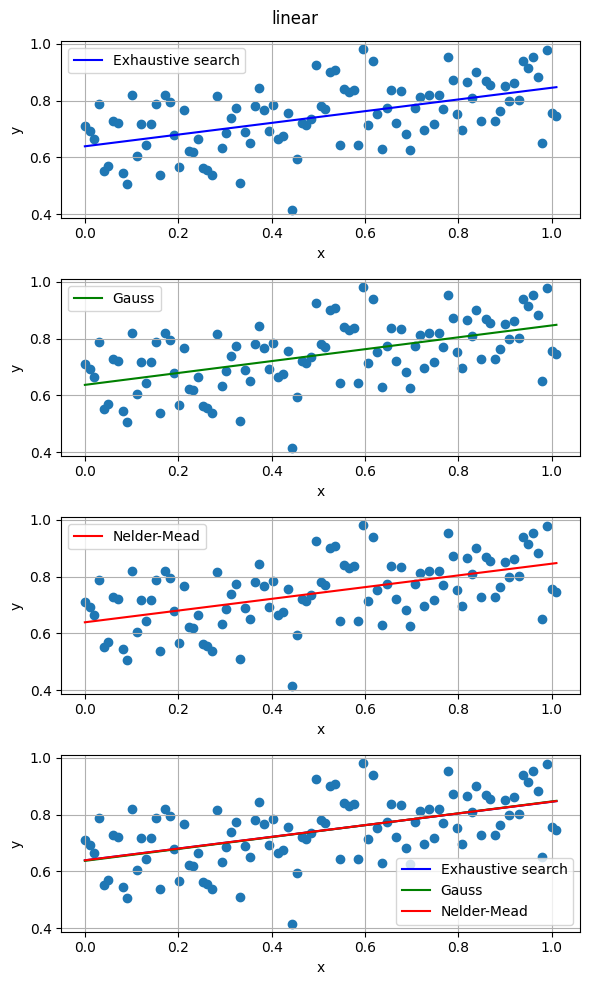

In [52]:
methods_and_coafs = {
    'Exhaustive search': brute_force_coafs,
    'Gauss': coord_descent_coefs,
    'Nelder-Mead': nelder_mead['x'],
}

plot_aprox_result(x, y, methods_and_coafs,linear, 'linear')

[ 0.64833069 -0.24081182]
[ 0.65  -0.238]
[ 0.64814941 -0.2411442 ]


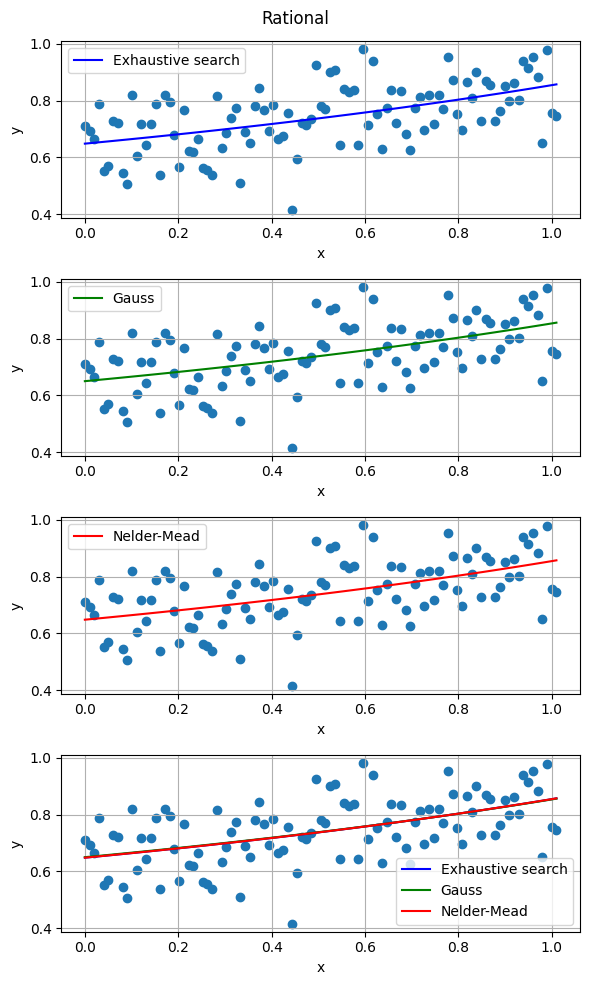

In [53]:
methods_and_coafs = {
    'Exhaustive search': brute_force_coafs_rational,
    'Gauss': coord_descent_coefs_rational,
    'Nelder-Mead': nelder_mead_rational['x'],
}

plot_aprox_result(x, y, methods_and_coafs,rational, 'Rational')

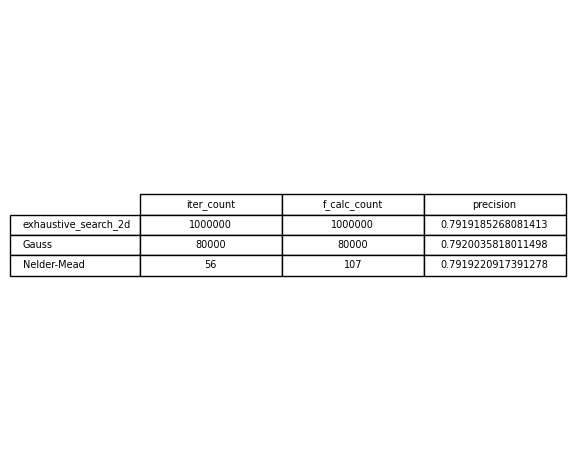

In [ ]:
make_table_2d([brute_force_result,coordinate_descent_result,nelder_mead_result])

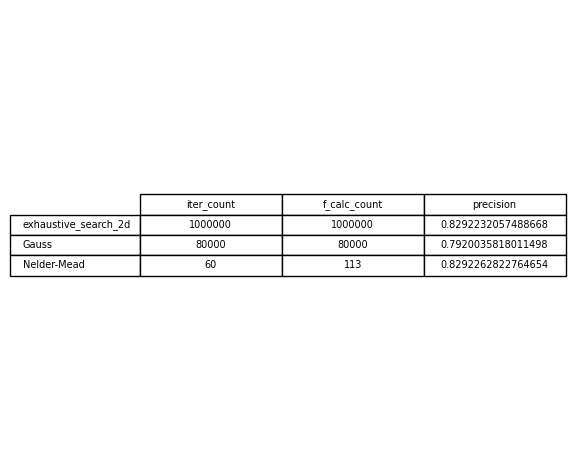

In [ ]:
make_table_2d([brute_force_result_rational,coordinate_descent_result_rational,nelder_mead_result_rational])